### Regulation kinetics of Na+-Ca2+ exchange current in guinea-pig ventricular myocytes

------------

#### Import libraries

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Define Constant

In [4]:
Na = 100
Ca = 100
K_ci = 0.01*1e-3
K_4ni = 8*1e-3
K_3ni = 9*1e-3
K_2ni = 9*1e-3
K_1ni = 700*1e-3
asym = 80*1e-3 
V_m = 0*1e-3
kvm = np.exp(2.0*V_m/53.08)
K_Ca_act = 0.004*1e-3

alpha1_Ca_on = 2.0
alpha1_Ca_off = 1.5
beta1_Ca_on = 1.2
beta1_Ca_off = 0.0005

alpha2_Ca_on = 0.03
alpha2_Ca_off = 10
beta2_Ca_on = 90
beta2_Ca_off = 0.1

In [5]:
D_i = (Na**4)*K_ci +\
      (Na**3)*K_ci*K_4ni +\
      (Na**2)*K_ci*K_4ni*K_3ni + \
      (Na**1)*K_ci*K_4ni*K_3ni*K_2ni + \
      K_ci*K_4ni*K_3ni*K_2ni*K_1ni + \
      Ca*K_4ni*K_3ni*K_2ni*K_1ni

In [6]:
D_i

1000.0800525606527

In [7]:
F_E14Na = (Na**4)*K_ci/D_i
F_E1Ca = Ca*K_1ni*K_2ni*K_3ni*K_4ni/D_i

F_E24Na = (Na**4)*K_ci/D_i
F_E2Ca = Ca*K_1ni*K_2ni*K_3ni*K_4ni/D_i

In [8]:
K_1no = (asym**0.25)*K_1ni
K_2no = (asym**0.25)*K_2ni
K_3no = (asym**0.25)*K_3ni
K_4no = (asym**0.25)*K_4ni
K_co =  (asym**0.25)*K_ci

In [9]:
k1 = F_E14Na*1000*kvm
k2 = F_E24Na*1000/kvm
k3 = F_E2Ca*1000
k4 = F_E1Ca*1000

In [10]:
[k1,k2,k3,k4]

[999.9199538472469,
 999.9199538472469,
 4.535636910651113e-05,
 4.535636910651113e-05]

In [11]:
F_Ca_act = Ca/(Ca+K_Ca_act)

In [12]:
alpha1 = F_E14Na*((F_Ca_act*alpha1_Ca_on) + (1-F_Ca_act)*alpha1_Ca_off)
beta1 = F_Ca_act*beta1_Ca_on + (1-F_Ca_act)*beta1_Ca_off

In [13]:
alpha2 = F_Ca_act*alpha2_Ca_on + (1-F_Ca_act)*alpha2_Ca_off
beta2 = F_Ca_act*beta2_Ca_on + (1-F_Ca_act)*beta2_Ca_off

---------

In [14]:
k = {"alpha1":alpha1,"beta1":beta1,\
    "alpha2":alpha2,"beta2":beta2,\
    "k1":k1,"k2":k2,"k3":k3,"k4":k4}

In [15]:
# function that returns dy/dt
def model(y,t,k):
    
    '''y[0] = FE1, y[1] = FI1, y[2] = FI2, y[3]=FE2'''
    
    dy1dt = y[3]*(k["k2"]+k["k3"]) + y[1]*k["beta1"] +\
            y[2]*k["beta2"] - y[0]*(k["k1"]+\
            k["k4"]+k["alpha1"]+k["alpha2"])
    
    dy2dt = y[0]*k["alpha1"] - y[1]*k["beta1"]
    dy3dt = y[0]*k["alpha2"] - y[2]*k["beta2"]
    dy4dt = 1 - (y[0] + y[1] + y[2])
    
    dydt = [dy1dt,dy2dt,dy3dt,dy4dt]
    return dydt

In [16]:
N = 1
T = 10

# initial condition
y0 = [1,0,0,0]


# time points
t = np.linspace(0,T)


'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))


y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
y4 = np.empty_like(t)
I  = np.empty_like(t)

for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]
    y4[i] = y[i][3]
    I[i] = y[i][0]*k1 - y[i][3]*k2

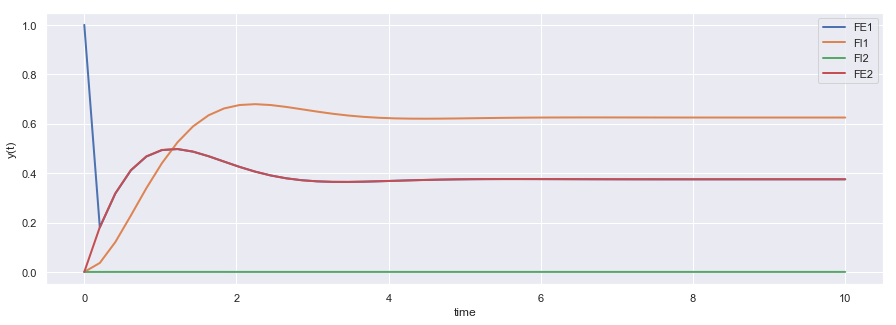

In [17]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,linewidth=2,label='FE1')
plt.plot(t,y2,linewidth=2,label='FI1')
plt.plot(t,y3,linewidth=2,label='FI2')
plt.plot(t,y4,linewidth=2,label='FE2')
#plt.plot(t,I,linewidth=2,label='I')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

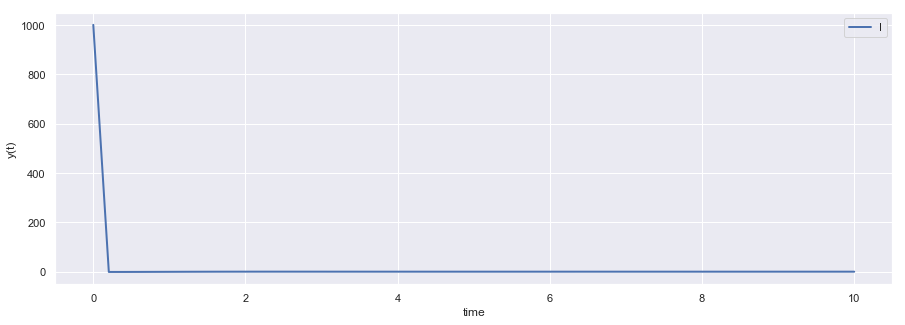

In [18]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,I,linewidth=2,label='I')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

----------

In [19]:
n = 40
T = 10

# initial condition
y0 = [1,0,0,0]
t = np.linspace(0,10,10)

y1,y2,y3,y4 = [],[],[],[]

for i in range(len(t)):
    tspan = [t[i-1],t[i]]
    
    '''solve ODEs'''
    y = odeint(model,y0,tspan,args=(k,))
    
    y1.append(y[1][0])
    y2.append(y[1][1])
    y3.append(y[1][2])
    y4.append(y[1][3])
    
    y0 = y[1]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


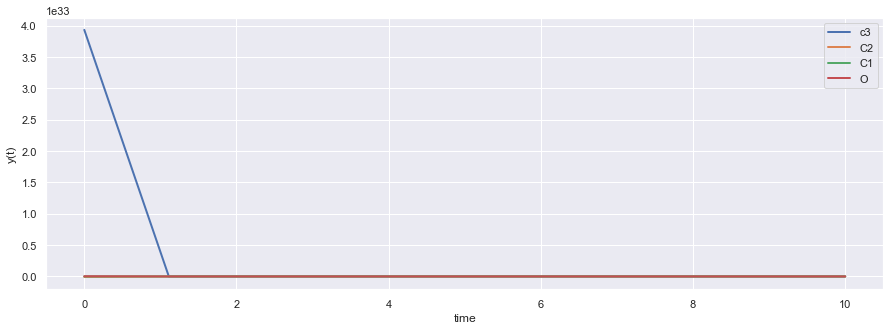

In [20]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,linewidth=2,label='c3')
plt.plot(t,y2,linewidth=2,label='C2')
plt.plot(t,y3,linewidth=2,label='C1')
plt.plot(t,y4,linewidth=2,label='O')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()